In [144]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)
from pytrends import dailydata
from functools import reduce
import numpy as np

In [279]:
#Loading google trends data daily
start_year=2019
start_month=1
end_year=2020
end_month=10
keywords=['virus','crisis']

keywords=['recession',
          'war',
          'stock market',
          'conflict',
          'terrorism',
          'mortgage',
          'bankrupcy',
          'debt',
          'elections',
          'economy',
          'protest',
          'shooting',
          'food bank',
          'loan']


df_list=[]
for keyword in keywords:
    df_tmp = dailydata.get_daily_data(keyword, start_year, start_month, end_year, end_month, geo = 'US')
    df_list.append(df_tmp[keyword].to_frame())

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), df_list)



recession:2019-01-01 2019-01-31
recession:2019-02-01 2019-02-28
recession:2019-03-01 2019-03-31
recession:2019-04-01 2019-04-30
recession:2019-05-01 2019-05-31
recession:2019-06-01 2019-06-30
recession:2019-07-01 2019-07-31
recession:2019-08-01 2019-08-31
recession:2019-09-01 2019-09-30
recession:2019-10-01 2019-10-31
recession:2019-11-01 2019-11-30
recession:2019-12-01 2019-12-31
recession:2020-01-01 2020-01-31
recession:2020-02-01 2020-02-29
recession:2020-03-01 2020-03-31
recession:2020-04-01 2020-04-30
recession:2020-05-01 2020-05-31
recession:2020-06-01 2020-06-30
recession:2020-07-01 2020-07-31
recession:2020-08-01 2020-08-31
recession:2020-09-01 2020-09-30
recession:2020-10-01 2020-10-31
war:2019-01-01 2019-01-31
war:2019-02-01 2019-02-28
war:2019-03-01 2019-03-31
war:2019-04-01 2019-04-30
war:2019-05-01 2019-05-31
war:2019-06-01 2019-06-30
war:2019-07-01 2019-07-31
war:2019-08-01 2019-08-31
war:2019-09-01 2019-09-30
war:2019-10-01 2019-10-31
war:2019-11-01 2019-11-30
war:2019-1

food bank:2019-04-01 2019-04-30
food bank:2019-05-01 2019-05-31
food bank:2019-06-01 2019-06-30
food bank:2019-07-01 2019-07-31
food bank:2019-08-01 2019-08-31
food bank:2019-09-01 2019-09-30
food bank:2019-10-01 2019-10-31
food bank:2019-11-01 2019-11-30
food bank:2019-12-01 2019-12-31
food bank:2020-01-01 2020-01-31
food bank:2020-02-01 2020-02-29
food bank:2020-03-01 2020-03-31
food bank:2020-04-01 2020-04-30
food bank:2020-05-01 2020-05-31
food bank:2020-06-01 2020-06-30
food bank:2020-07-01 2020-07-31
food bank:2020-08-01 2020-08-31
food bank:2020-09-01 2020-09-30
food bank:2020-10-01 2020-10-31
loan:2019-01-01 2019-01-31
loan:2019-02-01 2019-02-28
loan:2019-03-01 2019-03-31
loan:2019-04-01 2019-04-30
loan:2019-05-01 2019-05-31
loan:2019-06-01 2019-06-30
loan:2019-07-01 2019-07-31
loan:2019-08-01 2019-08-31
loan:2019-09-01 2019-09-30
loan:2019-10-01 2019-10-31
loan:2019-11-01 2019-11-30
loan:2019-12-01 2019-12-31
loan:2020-01-01 2020-01-31
loan:2020-02-01 2020-02-29
loan:2020-03-0

<AxesSubplot:xlabel='date'>

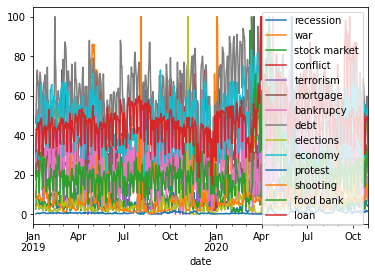

In [280]:
df_merged.plot()

In [398]:
import yfinance as yf
vix_obj = yf.Ticker("^VIX")
df_vix = vix_obj.history(period="max")
df_vix=df_vix['Close'].to_frame()
df_vix.rename(columns={'Close':'VIX'},inplace=True)

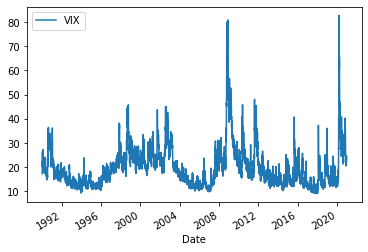

In [399]:
df_vix.plot()
keywords=['stock market','mortgage','bankrupcy','loan']
# keywords=['recession',
#           'war',
#           'stock market',
#           'conflict',
#           'terrorism',
#           'mortgage',
#           'bankrupcy',
#           'debt',
#           'elections',
#           'economy',
#           'protest',
#           'shooting',
#           'food bank',
#           'loan']

In [400]:
df_vix['VIX_stat']=np.log(df_vix['VIX'])-np.log(df_vix['VIX'].shift(1))
df_trends=df_merged
# df_trends=np.log(df_trends)-np.log(df_trends.shift(1))
# df_trends=df_trends.shift(1)

df_vix=pd.merge(df_vix,df_trends,how='left',left_index=True,right_index=True)
df_vix=np.abs(df_vix-df_vix.shift(1))
df_vix[keywords]=df_vix[keywords].rolling(20).mean()

df_vix.dropna(inplace=True)
df_vix.index=pd.to_datetime(df_vix.index)
df_vix=df_vix[['VIX'] + keywords]

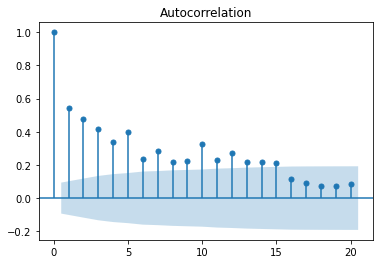

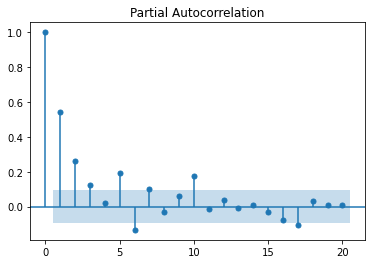

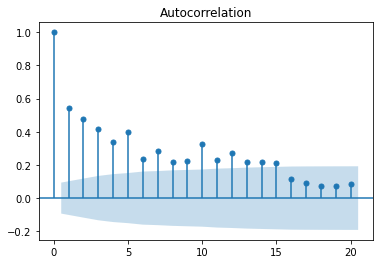

In [401]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(df_vix['VIX'], lags=20)
plot_acf(df_vix['VIX'], lags=20)

In [402]:
from statsmodels.tsa.arima.model import ARIMA
model_arma_endo=ARIMA(endog=df_vix['VIX'],order=(3,0,0)).fit()
model_arma_endo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    VIX   No. Observations:                  440
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -912.865
Date:                Wed, 16 Dec 2020   AIC                           1835.731
Time:                        21:33:17   BIC                           1856.165
Sample:                             0   HQIC                          1843.792
                                - 440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4822      0.499      2.971      0.003       0.504       2.460
ar.L1          0.3667      0.018     20.192      0.000       0.331       0.402
ar.L2          0.2126      0.018     11.713      0.000       0.177       0.248
ar.L3          0.1228      0.020      6.022      0.000       0.083       0.163
sigma2         3.7073      0.091     40.570      0.000       3.528       3.886
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9285.53
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.10   Skew:                             2.84
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

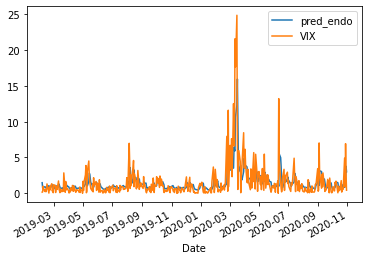

In [403]:
predictions_endo=model_arma_endo.predict()
df_vix['pred_endo']=predictions_endo
df_vix[['pred_endo','VIX']].plot()

In [355]:
# result=pytrends.interest_over_time()

In [404]:
from statsmodels.tsa.api import VAR
model = VAR(df_vix[['VIX']+keywords])
for i in [1,2,3,4,5,6,7,8,9,10]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('aic : ', result.aic)

model = VAR(df_vix[['VIX']+keywords])
result = model.fit(6)
result.summary()

# model_arma_exo=ARIMA(endog=df_vix['VIX'],exog=df_vix[['virus']],order=(4,0,0)).fit()
# model_arma_exo.summary()

Lag Order = 1
aic :  -6.672190962294467
Lag Order = 2
aic :  -6.859493824645694
Lag Order = 3
aic :  -6.853849737891324
Lag Order = 4
aic :  -6.968726264707316
Lag Order = 5
aic :  -7.067948981690584
Lag Order = 6
aic :  -7.527425773661931
Lag Order = 7
aic :  -7.525649979805557
Lag Order = 8
aic :  -7.53972196242303
Lag Order = 9
aic :  -7.61351500313898
Lag Order = 10
aic :  -7.639869775016711


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 16, Dec, 2020
Time:                     21:33:23
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -6.07277
Nobs:                     434.000    HQIC:                  -6.95324
Log likelihood:          -1290.65    FPE:                0.000538778
AIC:                     -7.52743    Det(Omega_mle):     0.000381587
--------------------------------------------------------------------
Results for equation VIX
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.539047         0.514513            1.048           0.295
L1.VIX                  0.218950         0.051639            4.240           0.000
L1.stock market         0.964564         0.294227     

<AxesSubplot:xlabel='Date'>

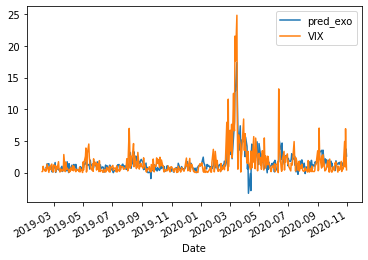

In [405]:
predictions_exo=result.fittedvalues['VIX']
df_vix['pred_exo']=predictions_exo
df_vix[['pred_exo','VIX']].plot()

In [408]:
print(np.mean(np.abs(df_vix['pred_endo']-df_vix['VIX'])))
print(np.mean(np.abs(df_vix['pred_exo']-df_vix['VIX'])))

1.0325931572461633
1.0389703602223048


In [409]:
from tqdm import tqdm
import dask
dask.config.set(scheduler='processes')

@dask.delayed
def compute_ARIMA_endo_pred(df,order,index_insample,rolling_window):
    df_training=df.iloc[index_insample-rolling_window:index_insample]
    outsample=df.iloc[index_insample]
        
    result_fit = ARIMA(endog=df_training['VIX'],order=order).fit()
    result_pred=result_fit.predict(start=len(df_training), end=len(df_training)).values[0]
    return result_pred

@dask.delayed
def compute_ARIMA_exo_pred(df,order, exogenous_regressors, index_insample,rolling_window):
    df_training=df.iloc[index_insample-rolling_window:index_insample]
    outsample=df.iloc[index_insample]
        
    result_fit = ARIMA(endog=df_training['VIX'],order=order,exog=df_training[exogenous_regressors]).fit()
    result_pred=result_fit.predict(start=len(df_training), end=len(df_training),exog=list(outsample[exogenous_regressors])).values[0]
    return result_pred

@dask.delayed
def compute_VAR_exo_pred(df,order, exogenous_regressors, index_insample,rolling_window):
    df_training=df.iloc[index_insample-rolling_window:index_insample]
    outsample=df.iloc[index_insample]
    try:
        result_fit = VAR(df_training).fit(order)
        result_pred=result_fit.forecast(y=df_training.values[-order:],steps=1)[0][0]
    except:
        result_pred=np.nan
    return result_pred

def rolling_ARMA_endo(df, start_window, rolling_window, order=(4,0,3)):
#     df['pred_rolling_endo']=np.nan
    result=[]
    all_results_dask=[compute_ARIMA_endo_pred(df,order,index_insample,rolling_window) for index_insample in np.arange(start_window,len(df))]
    all_results=dask.compute(all_results_dask)
    
    return all_results

def rolling_ARMA_exo(df, start_window, rolling_window, order=(4,0,3), exogenous_regressors=['crisis']):
#     df['pred_rolling_endo']=np.nan
    result=[]
    all_results_dask=[compute_ARIMA_exo_pred(df,order, exogenous_regressors,index_insample,rolling_window) for index_insample in np.arange(start_window,len(df))]
    all_results=dask.compute(all_results_dask)
    
    return all_results
def rolling_VAR_exo(df, start_window, rolling_window, order=4, exogenous_regressors=['crisis']):
#     df['pred_rolling_endo']=np.nan
    result=[]
    all_results_dask=[compute_VAR_exo_pred(df,order, exogenous_regressors,index_insample,rolling_window) for index_insample in np.arange(start_window,len(df))]
    all_results=dask.compute(all_results_dask)
    
    return all_results

# def rolling_ARMA_endo(df, window,order=(4,0,3)):
#     df['pred_rolling_endo']=np.nan
#     result=[]
#     for i in tqdm(np.arange(window,len(df))):
#         df_training=df.iloc[0:i]
#         outsample=df.iloc[i]
        
#         result_fit = ARIMA(endog=df_training['VIX'],order=order).fit()
#         result_pred=result_fit.predict(start=len(df_training), end=len(df_training)).values[0]
#         result.append(result_pred)
# #         df.iloc[i]['pred_rolling_endo']=result_pred
#     df.iloc[window,len(df)]['pred_rolling_endo']=result
#     return df




#Trends model
# def rolling_ARMA_exo(df, window, order=(4,0,3), exogenous_regressors=['crisis']):
#     df['pred_rolling_exo']=np.nan
#     result=[]
#     for i in tqdm(np.arange(window, len(df))):
#         df_training=df.iloc[0:i]
#         outsample=df.iloc[i]
        
#         result_fit=ARIMA(endog=df_training['VIX'],order=order,exog=df_training[exogenous_regressors]).fit()
#         result_pred=result_fit.predict(start=len(df_training), end=len(df_training),exog=outsample[regressor_names]).values[0]
#         df.iloc[i]['pred_rolling_endo']=result_pred
#     df.iloc[window,len(df)]['pred_rolling_exo']=result
#     return df

In [410]:
import warnings
warnings.filterwarnings("ignore")
start_rolling=90
window_rolling=90
pred_list_endo=rolling_ARMA_endo(df_vix, start_rolling,window_rolling, order=(3,0,0))
pred_list_exo=rolling_VAR_exo(df_vix[['VIX']+keywords], start_rolling, window_rolling, order=6, exogenous_regressors=keywords)

In [411]:
df_vix['pred_rolling_endo']=np.nan
df_vix.iloc[start_rolling:len(df_vix)]['pred_rolling_endo']=pred_list_endo[0]

df_vix['pred_rolling_exo']=np.nan
df_vix.iloc[start_rolling:len(df_vix)]['pred_rolling_exo']=pred_list_exo[0]


In [412]:

from sklearn.metrics import mean_absolute_error
df_final=df_vix
df_final.dropna(inplace=True)
baseline_mae = mean_absolute_error(df_final['VIX'], df_final['pred_rolling_endo'])
trends_mae = mean_absolute_error(df_final['VIX'], df_final['pred_rolling_exo'])
improvement = (baseline_mae-trends_mae)/baseline_mae

print(f"MAE of the baseline model: {baseline_mae*100:.2f}%")
print(f"MAE of the trends model: {trends_mae*100:.2f}%")
print(f"MAE improvement: {improvement*100:.2f}%")

MAE of the baseline model: 123.83%
MAE of the trends model: 189.06%
MAE improvement: -52.68%


In [396]:
print(np.mean(np.abs(df_final['VIX']-df_final['pred_rolling_endo'])))
print(np.mean(np.abs(df_final['VIX']-df_final['pred_rolling_exo'])))


1.238281231683941
13.9637715642668


<AxesSubplot:xlabel='Date'>

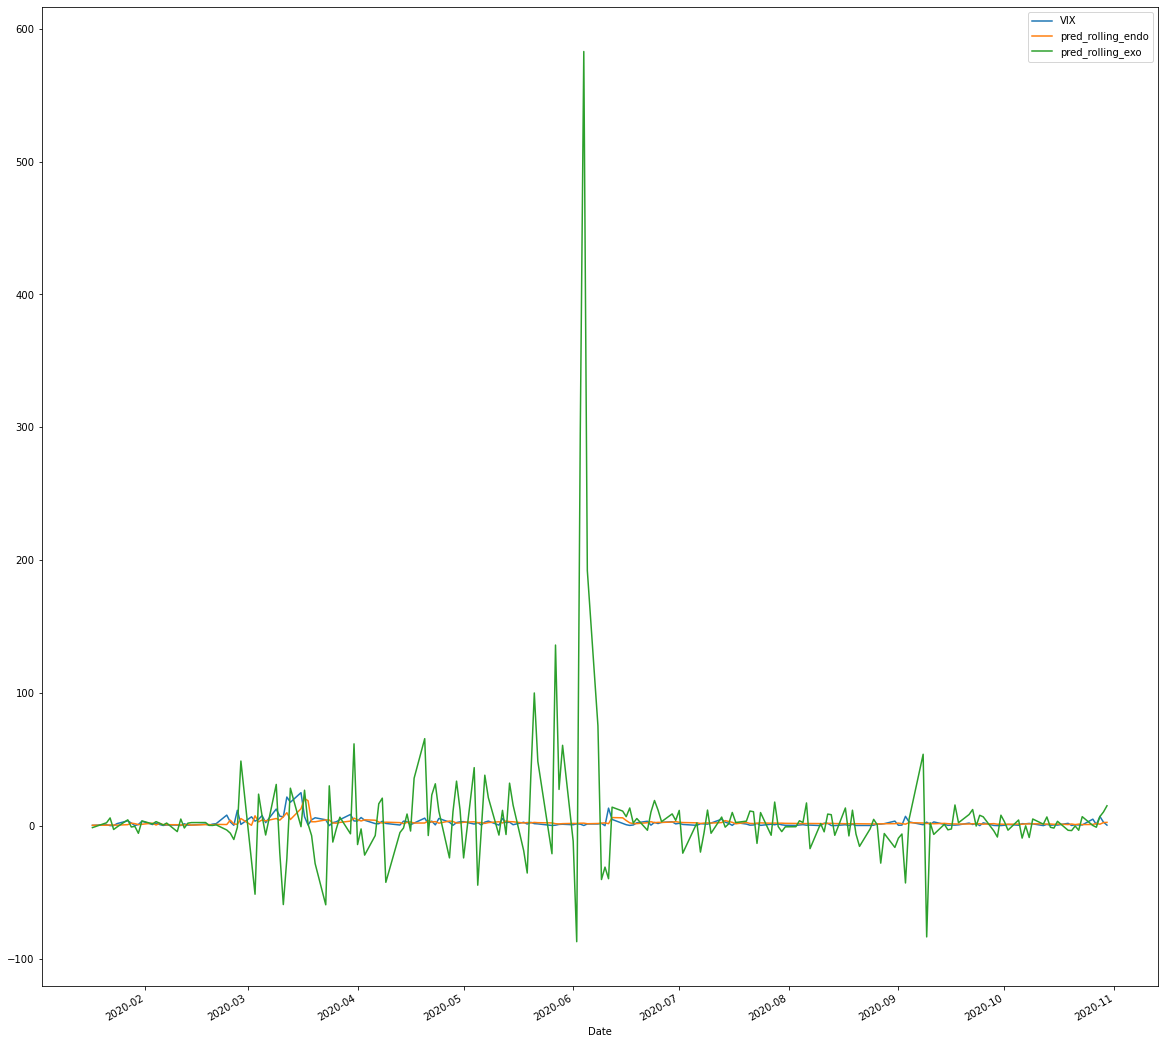

In [397]:
df_vix.iloc[len(df_vix)-200:len(df_vix)][['VIX','pred_rolling_endo','pred_rolling_exo']].plot(figsize=(20,20))

In [278]:
df_vix.describe()

,VIX,virus,crisis,pred_endo,pred_exo,pred_rolling_endo,pred_rolling_exo
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,0.079200,0.002255,-0.022255,0.035865,0.037600,0.067801,0.074962
std,3.408263,4.372808,7.486629,1.344066,1.559107,1.280179,1.474015
min,-17.639999,-28.820000,-33.000000,-7.784410,-7.182874,-4.545553,-11.612551
25%,-1.075000,-0.300000,-2.580000,-0.369725,-0.400039,-0.310557,-0.356474
50%,-0.150000,-0.040000,-0.140000,0.012316,0.029712,0.015715,-0.005666
75%,0.765000,0.180000,2.065000,0.410073,0.488857,0.318983,0.575451
max,24.860001,35.690000,73.760000,10.445945,13.712208,10.632591,6.063717


In [3]:
# result=pytrends.interest_over_time()